### Conway’s Game of Life
Conway’s Game of Life (https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life) is a classic example of a cellular automaton devised by mathematician John Conway. The game is a classic example of how simple rules can give rise to complex behavior. The game is played on an m-by-n board, which we will represent as an m-by-n matrix. The game proceeds in steps. At any given time, each cell of the board (i.e., entry of our matrix), is either alive (which we will represent as a 1) or dead (which we will represent as a 0). At each step, the board evolves according to a few simple rules:

• A live cell with fewer than two live neighbors becomes a dead cell.   
• A live cell with more than three live neighbors becomes a dead cell.   
• A live cell with two or three live neighbors remains alive.  
• A dead cell with exactly three live neighbors becomes alive.  
• All other dead cells remain dead.  

   The neighbors of a cell are the 8 cells adjacent to it, i.e., left, right, above, below, upper- left, lower-left, upper-right and lower-right. We will follow the convention that the board is toroidal, so that using matrix-like notation (i.e., the cell (0,0) is in the upper-left of the board and the first coordinate specifies a row), the upper neighbor of the cell (0,0) is (m − 1,0), the right neighbor of the cell (m − 1,n − 1) is (m − 1,0), etc. That is, the board “wraps around”. 
   
   Note: you are not required to use this matrix-like indexing. It’s just what I chose to use to explain the toroidal property.

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

import copy
from matplotlib import animation
import time
from IPython.display import display,clear_output

%matplotlib inline

1. Write a function <span style="font-family:Courier; font-size:1em;">is_valid_board</span> that takes an m-by-n numpy array (i.e., an ndarray) as its only argument and returns a Python Boolean that is True if and only if the argument is a valid representation of a Game of Life board. A valid board is any two-dimensional numpy ndarray with all entries either 0.0 and 1.0.

In [66]:
def is_valid_board(a):
    A = True
    for i in a:
        for j in i:
            if (j != 0 and j !=1):
                A = False
    return(A)

In [67]:
a = np.array([[0,1,0,1], [1,0,0,1], [1,1,0,0]])
is_valid_board(a)

True

In [68]:
b = np.array([[0,1,1,1], [0,0,0,3], [1,1,0,0]])
is_valid_board(b)

False

2. Write a function called <span style="font-family:Courier; font-size:1em;">gol_step</span> that takes an m-by-n numpy array as its argument and returns another numpy array of the same size (i.e., also m-by-n), corresponding to the board at the next step of the game. 

    Your function should perform error checking to ensure that the provided argument is a valid Game of Life board.

In [69]:
def gol_step(a):
    size = np.shape(a)
    board = np.zeros(size)
    return(board)


In [70]:
x = np.array([[0, 1, 0, 0, 0],
 [1, 0, 0, 1, 0],
 [1, 0, 0, 0, 1],
 [0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0]])
y = gol_step(x)
print(y)


[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


3. Write a function called draw_gol_board that takes an m-by-n numpy array (i.e., an ndarray) as its only argument and draws the board as an m-by-n set of tiles, colored black or white correspond to whether the corresponding cell is alive or dead, respectively. Your plot should not have any grid lines, nor should it have any axis labels or axis ticks. 

    Hint: see the functions plt.xticks() and plt.yticks() for changing axis ticks. 
    
    Hint: you may find the function plt.get_cmap to be useful for working with the matplotlib Colormap objects.

In [71]:
def draw_gol_board(a):
    plt.figure(frameon=False)
    plt.imshow(a, cmap='gray_r', interpolation='nearest')
    plt.xticks([])
    plt.yticks([])



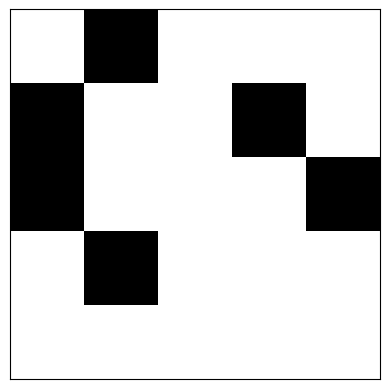

In [72]:
x
board = draw_gol_board(x)

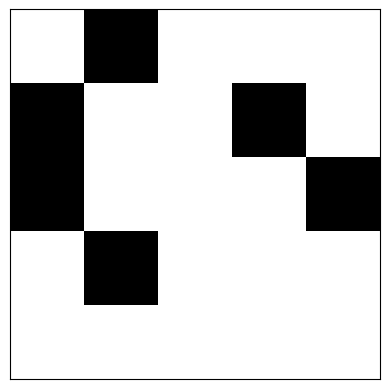

In [73]:
board = draw_gol_board(x)

4.  Create a 20-by-20 numpy array corresponding to a Game of Life board in which all cells are dead, with the exception that the top-left 5-by-5 section of the board looks like this:
    
    Plot this 20-by-20 board using draw_gol_board.

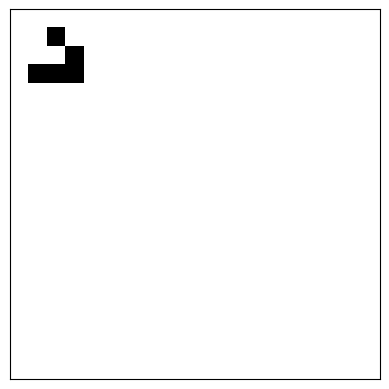

In [74]:
def init():
    board = np.zeros((20,20))
    black = [
        [1,2],
        [2,3],
        [3,1],
        [3,2],
        [3,3]
    ]
    for i in black:
        board[i[0]][i[1]] = 1
    return board

board = init()
draw_gol_board(board)


5. Generate a plot with 5 subplots, arranged in a 5-by-1 grid, showing the first five steps of the Game of Life when started with the board you just created, with the steps ordered from top to bottom, The figure in the 5-by-5 sub-board above is called a glider, and it is interesting in that, as you can see from your plot, it seems to move along the board as you run the game.

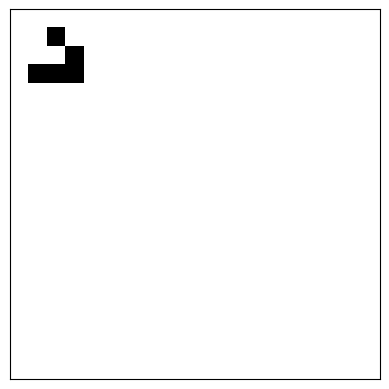

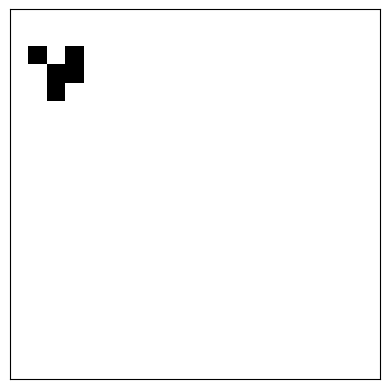

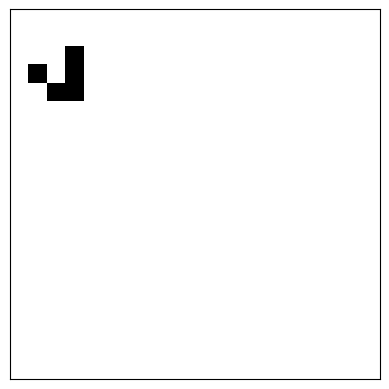

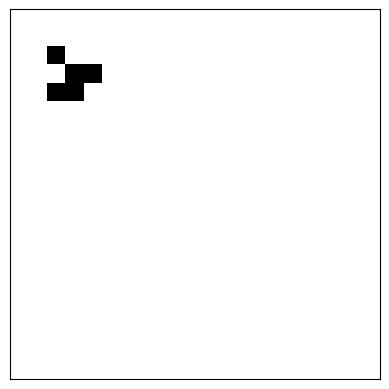

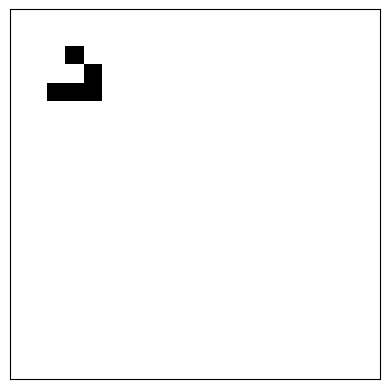

In [75]:
def alive(grid,y,x):
    around = [[y-1,y,y+1],[x-1,x,x+1]]
    if y+1 == len(grid):
        around[0][2] = 0
    if x+1 == len(grid):
        around[1][2] = 0

    neighbor = []
    for i in range(3):
        for j in range(3):
            if i ==1 and j == 1:
                continue
            neighbor.append([around[0][i],around[1][j]])
    
    total = 0
    for i in neighbor :
        y = i[0]
        x = i[1]
        total += board[y][x]

    return total

def iteration(grid):
    new_board = np.copy(grid) #不影響原本的格式導致判斷錯誤
    rows , columns =  len(grid), len(grid[0])

    for i in range(rows):
        for j in range(columns):
            value = grid[i][j]
            neighbor = alive(board,i,j)
            if value ==1:
                if neighbor <2 or neighbor >3: #非<2或>3，繼續存活
                    new_board[i][j] =0
            else:
                if neighbor ==3:
                    new_board[i][j] =1
    return new_board

draw_gol_board(board)
for step in range(4):
    board = iteration(board)
    draw_gol_board(board)


6. Create a function called draw_animation that takes two arguments, a Game of Life board and a number of steps, and generates an animation of the game as it runs for the given number of steps.

In [76]:
def draw_animation(board,times): 

    fig, ax = plt.subplots()
    img = ax.imshow(board, cmap='gray_r', interpolation='none')  #移除框線
    ax.set_xticks([])  
    ax.set_yticks([])  

    
    def update(frame):
        global board #直接針對全域board進行修改
        board = iteration(board)  
        img.set_data(board)  
        return [img]

    ani = animation.FuncAnimation(fig, update, frames=times, interval=200) #, blit=True

    # 顯示動畫
    ani.save('game_of_life.gif', writer='imagemagick') #我的vscode無法顯示動畫，所以以另存gif的方式提供助教們檢查。謝謝你們，辛苦了
    plt.show()
    

MovieWriter imagemagick unavailable; using Pillow instead.


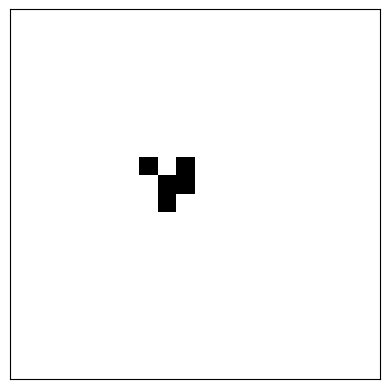

In [77]:
a = init()
draw_animation(a,100)